In [12]:
import csv
import numpy as np
from scipy.integrate import quad
from numpy import *
from scipy import *
amuE = 116592059e-11 #116592089E-11 #
amuT = 116591810e-11
amu = amuE-amuT
EamuE = 22e-11
EamuT = 43e-11
Eamu = np.sqrt(EamuE**2 + EamuT**2)
amu_up = amu+Eamu
amu_down = amu-Eamu
amu, Eamu, amu_up, amu_down

(2.490000000025111e-09,
 4.830113870293329e-10,
 2.973011387054444e-09,
 2.0069886129957782e-09)

In [13]:
# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
linestyle_str = [
    ('solid', 'solid'), # Same as (0, ()) or '-'
    ('dotted', '.'),    # Same as (0, (1, 1)) or '.'
    ('dashed', '--'),   # Same as '--'
    ('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
from  matplotlib import *
import mplhep as hep 
hep.style.use(hep.style.ATLAS)
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (8,6)
import matplotlib.patheffects as pe
# Global Parameters in GeV units
m_mu = 0.105  # Muon mass
# Experimental Bounds
bound_current_eup = [(x, amu_up) for x in range(1, 100000)]
bound_current_down = [(x, amu_down) for x in range(1, 100000)]
sigma_current = [(x, Eamu) for x in range(1, 100000)]
#sigma_projected = [(x, 34e-11) for x in range(1, 100000)]

/tmp/ipykernel_8963/3751664601.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(VquiEA, DamPhiIEA,'-b',linestyle = 'solid',linewidth=2,label=r'$\Lambda=0.1$', markersize=0.0,zorder=0.5)
/tmp/ipykernel_8963/3751664601.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(VquiEA, DamPhiIEB,'-k',linestyle = 'solid',linewidth=2,label=r'$\Lambda=0.05$', markersize=0.0,zorder=0.5)


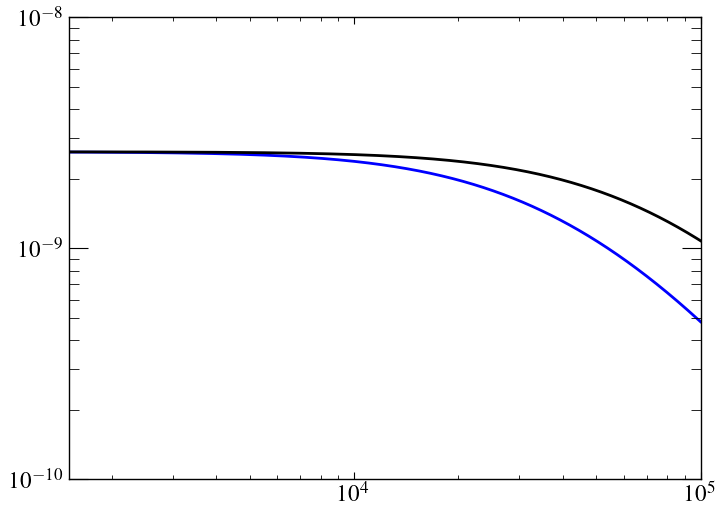

In [14]:
m_E = 400
epsilon_1 = m_E/m_mu 
lambda22=6.0
gs1 = lambda22/2
gp1 = gs1
def lambda1_func(m_mu, Mphi):
    return m_mu / Mphi
def Mphi_funcA(Vqui):
    return 0.01 * Vqui
def integrand(x, epsilon_1, lambda1, sign=1):
    return (x**2 * (1 + sign*epsilon_1 - x)) / ((1 - x) * (1 - lambda1**2 * x) + epsilon_1**2 * lambda1**2 * x)
def compute_deltaA(Vqui, m_mu):
    Mphi = Mphi_funcA(Vqui)
    lambda1_val = lambda1_func(m_mu, Mphi)
    integral_pos, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, 1))
    integral_neg, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, -1))
    term1 = (gs1**2 * m_mu**2) / (8 * np.pi**2 * Mphi**2) * integral_pos
    term2 = (gp1**2 * m_mu**2) / (8 * np.pi**2 * Mphi**2) * integral_neg
    return Vqui, term1 + term2
with open('DamPhiIE300A.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([compute_deltaA(Vqui, m_mu) for Vqui in range(1000, 100000, 100)])



def Mphi_funcB(Vqui):
    return 0.005 * Vqui
def compute_deltaB(Vqui, m_mu):
    Mphi = Mphi_funcB(Vqui)
    lambda1_val = lambda1_func(m_mu, Mphi)
    integral_pos, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, 1))
    integral_neg, _ = quad(integrand, 0, 1, args=(epsilon_1, lambda1_val, -1))
    term1 = (gs1**2 * m_mu**2) / (8 * np.pi**2 * Mphi**2) * integral_pos
    term2 = (gp1**2 * m_mu**2) / (8 * np.pi**2 * Mphi**2) * integral_neg
    return Vqui, term1 + term2
with open('DamPhiIE300B.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([compute_deltaB(Vqui, m_mu) for Vqui in range(1000, 100000, 100)])

VquiEA = np.genfromtxt("DamPhiIE300A.csv",delimiter=",")[0:,0] 
DamPhiIEA = np.genfromtxt("DamPhiIE300A.csv",delimiter=",")[0:,1]
DamPhiIEB = np.genfromtxt("DamPhiIE300B.csv",delimiter=",")[0:,1]
DamPhiIEA

plt.plot(VquiEA, DamPhiIEA,'-b',linestyle = 'solid',linewidth=2,label=r'$\Lambda=0.1$', markersize=0.0,zorder=0.5)
plt.plot(VquiEA, DamPhiIEB,'-k',linestyle = 'solid',linewidth=2,label=r'$\Lambda=0.05$', markersize=0.0,zorder=0.5)
plt.xlim([1.5e03,1e05])
plt.yscale('log')
plt.xscale('log')

/tmp/ipykernel_8963/935709453.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0, 22300, color='darkgray',alpha=0.3,edgecolor='none',zorder=0.1)
/tmp/ipykernel_8963/935709453.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0, 11300, color='skyblue',alpha=0.2,edgecolor='none',zorder=0.1)
/tmp/ipykernel_8963/935709453.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0, 5000, color='magenta',edgecolor='none',zorder=0.3,alpha=0.2)
/tmp/ipykernel_8963/935709453.py:54: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(VquiEA, DamPhiIEA,'-b',linestyle = 'solid',linewidth=2,label=r'$M_{\phi}=0.01$ $v_{\chi}$', markersize=0.0,zorder=0.5,path_effects=pek1)
/tmp/ipykerne

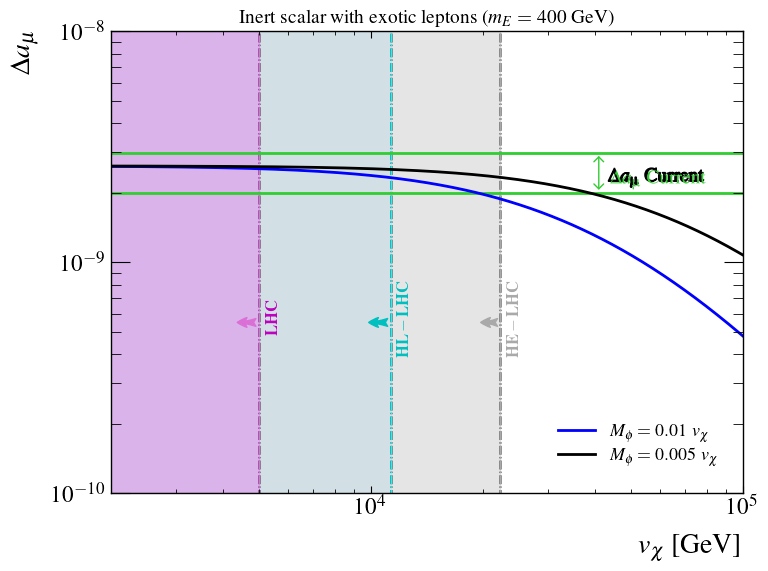

In [24]:
mpl.rcParams['figure.figsize'] = (8,6)
shadow = [pe.PathPatchEffect(offset=(-1.5, 1.5), facecolor='k'),
          pe.PathPatchEffect(edgecolor='k', linewidth=0.0, facecolor='limegreen')]
shadow2 = [pe.PathPatchEffect(offset=(-1.5, 1.5), facecolor='k'),
          pe.PathPatchEffect(edgecolor='k', linewidth=0.0, facecolor='crimson')]          
shadow3 = [pe.PathPatchEffect(offset=(-1.5, 1.5), facecolor='k'),
          pe.PathPatchEffect(edgecolor='k', linewidth=0.0, facecolor='darkgray')]
opt = dict(color='orchid', 
            arrowstyle = 'fancy,head_width=.5,head_length=0.5',
            connectionstyle = 'arc3,rad=0')
opt2 = dict(color='c', 
            arrowstyle = 'fancy,head_width=.5,head_length=0.5',
            connectionstyle = 'arc3,rad=0')
opt3 = dict(color='darkgray', 
            arrowstyle = 'fancy,head_width=.5,head_length=0.5',
            connectionstyle = 'arc3,rad=0')

pek2=[pe.Stroke(linewidth=1.9, foreground='k',alpha=0.5), pe.Normal()]
pek1=[pe.Stroke(linewidth=1, foreground='limegreen',alpha=0.8), pe.Normal()]
xLHC = np.array([5000, 5000, 5000, 5000])
xHLLHC = np.array([11300, 11300, 11300, 11300])
xHELHC = np.array([22300, 22300, 22300, 22300])
x1 = np.array([100, 500, 1000, 2000, 5000])
m1 = 0
c1 = 10e-12
m2 = 0
c2 = 10e-08
def yl1(xl1,c1,m1):
    return (m1*xl1+c1)
def yl2(xl1,c2,m2):
    return (m2*xl1+c2)
xl1=np.linspace(100, 5000, 100)
yLHC = np.array([10**(-12), 10**(-8), 10**(-7), 10**(6)])
plt.plot(xLHC,yLHC,'orchid',linestyle = '-.',lw=1, markersize=0.0,path_effects=pek2,zorder=0.5)
plt.plot(xHLLHC,yLHC,'aqua',linestyle = '-.',lw=1, markersize=0.0,path_effects=pek2,zorder=0.5)
plt.plot(xHELHC,yLHC,'darkgray',linestyle = '-.',lw=1, markersize=0.0,path_effects=pek2,zorder=0.5)
#plt.text(5300, 1.1e-09, r'LHC',path_effects=shadow3,fontsize=14)
plt.annotate('', xy=(4300,5.5e-10), xycoords='data',xytext =(4995,5.5e-10),textcoords = 'data',arrowprops=opt)#size=10)#
plt.annotate('', xy=(9700,5.5e-10), xycoords='data',xytext =(11290,5.5e-10),textcoords = 'data',arrowprops=opt2)#size=10)#
plt.annotate('', xy=(19400,5.5e-10), xycoords='data',xytext =(22290,5.5e-10),textcoords = 'data',arrowprops=opt3)#size=10)#
x = np.array([100, 1000, 5000, 8000, 100000])
plt.text(5200,5*10**(-10), r'$\it \bf LHC$',color='m',fontsize=12,rotation= 90,zorder=1)
plt.text(11700,4*10**(-10), r'$\it \bf HL-LHC$',color='c',fontsize=12,rotation= 90,zorder=1)
plt.text(23100,4*10**(-10),  r'$\it \bf HE-LHC $',color='darkgray',fontsize=12,rotation= 90,zorder=1)
plt.axvspan(0, 22300, color='darkgray',alpha=0.3,edgecolor='none',zorder=0.1)
plt.axvspan(0, 11300, color='skyblue',alpha=0.2,edgecolor='none',zorder=0.1)
plt.axvspan(0, 5000, color='magenta',edgecolor='none',zorder=0.3,alpha=0.2)
BoundCurrenteup = np.array([amu_up, amu_up, amu_up,amu_up, amu_up])
BoundCurrentdown= np.array([amu_down, amu_down, amu_down, amu_down, amu_down])
plt.annotate('', xy=(4.1*10e03,amu_up), xycoords='data',xytext =(4.1*10e03,amu_down),textcoords = 'data', arrowprops=dict(arrowstyle = '<->,head_width=0.25,head_length=0.25', color='limegreen',connectionstyle = 'arc3,rad=0'))
plt.text(4.4*10e03,2.2*10**(-9), r'$\Delta a_{\mu}$ Current',path_effects=shadow,fontsize=14)
plt.plot(x, BoundCurrenteup,'limegreen',linestyle = 'solid',linewidth=2,markersize=0.0,zorder=0.5,path_effects=pek1)#label=r'$\Delta  a_{\mu} = 339\times 10^{-11}$',
plt.plot(x, BoundCurrentdown,'limegreen',linestyle = 'solid',linewidth=2,markersize=0.0,zorder=0.5,path_effects=pek1)#label=r'$\Delta  a_{\mu} = 183\times 10^{-11}$',
plt.plot(VquiEA, DamPhiIEA,'-b',linestyle = 'solid',linewidth=2,label=r'$M_{\phi}=0.01$ $v_{\chi}$', markersize=0.0,zorder=0.5,path_effects=pek1)
plt.plot(VquiEA, DamPhiIEB,'-k',linestyle = 'solid',linewidth=2,label=r'$M_{\phi}=0.005$ $v_{\chi}$', markersize=0.0,zorder=0.5,path_effects=pek1)
plt.xlim([2.0e03,1e05])
plt.ylim([10**(-10),10**(-8)])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$v_{\chi}$ [GeV]',loc="right")
plt.ylabel(r'$\Delta a_{\mu} $',loc='top') 
plt.title(r'Inert scalar with exotic leptons ($m_{E} =400$ GeV)',fontsize=14)
plt.legend(loc='lower right', shadow=False, fontsize=13,frameon=False,ncol=1)
plt.savefig('331E400Muong-2.pdf', format='pdf', bbox_inches='tight')
#plt.draw()
plt.show()